### 상관계수 (Correlation Coefficient)
- 두 변수 간의 선형 관계의 강도와 방향을 측정하는 지표입니다.
- -1에서 +1 사이의 값을 가지며, ±1에 가까울수록 강한 선형 관계를 나타냅니다.
- 인과관계를 설명할 수 없습니다. 단순히 두 변수 간의 관련성을 나타낼 뿐입니다.

### 회귀 계수 (Regression Coefficient)
- 독립 변수가 종속 변수에 미치는 구체적인 영향의 크기와 방향을 나타냅니다.
- 인과 관계를 파악할 수 있으며, 독립 변수의 변화가 종속 변수에 미치는 평균적인 변화를 설명할 수 있습니다.

### 상관과 회귀의 차이
- **상관계수:** 두 변수의 선형 관계의 정도만을 측정하며, 관계의 방향성과 강도를 나타냅니다.
- **회귀계수:** 독립 변수가 종속 변수에 미치는 구체적인 영향을 파악하여 예측 가능성을 제공합니다.

### 결정 계수 $R^2$
- 회귀 모델의 적합도를 평가하는 지표로 사용됩니다.
- $R^2$ 값이 높을수록 모델이 종속 변수의 변동성을 더 잘 설명한다는 것을 의미합니다.
  - **$R^2 = 0$:** 모델이 설명력을 갖지 못함.
  - **$R^2 = 0.5$:** 모델이 어느 정도 설명력을 가짐.
  - **$R^2 = 1$:** 모델이 완벽한 설명력을 가짐.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib_inline.backend_inline

matplotlib_inline.backend_inline.set_matplotlib_formats("png2x") # svg, retina, png2x ...
mpl.style.use("seaborn-v0_8")
mpl.rcParams.update({"figure.constrained_layout.use": True})
sns.set_context("paper") 
sns.set_palette("Set2") 
sns.set_style("whitegrid") 

# 시스템 폰트패밀리에 따라 변경
plt.rc("font", family = "NanumSquareRound")
plt.rcParams["axes.unicode_minus"] = False

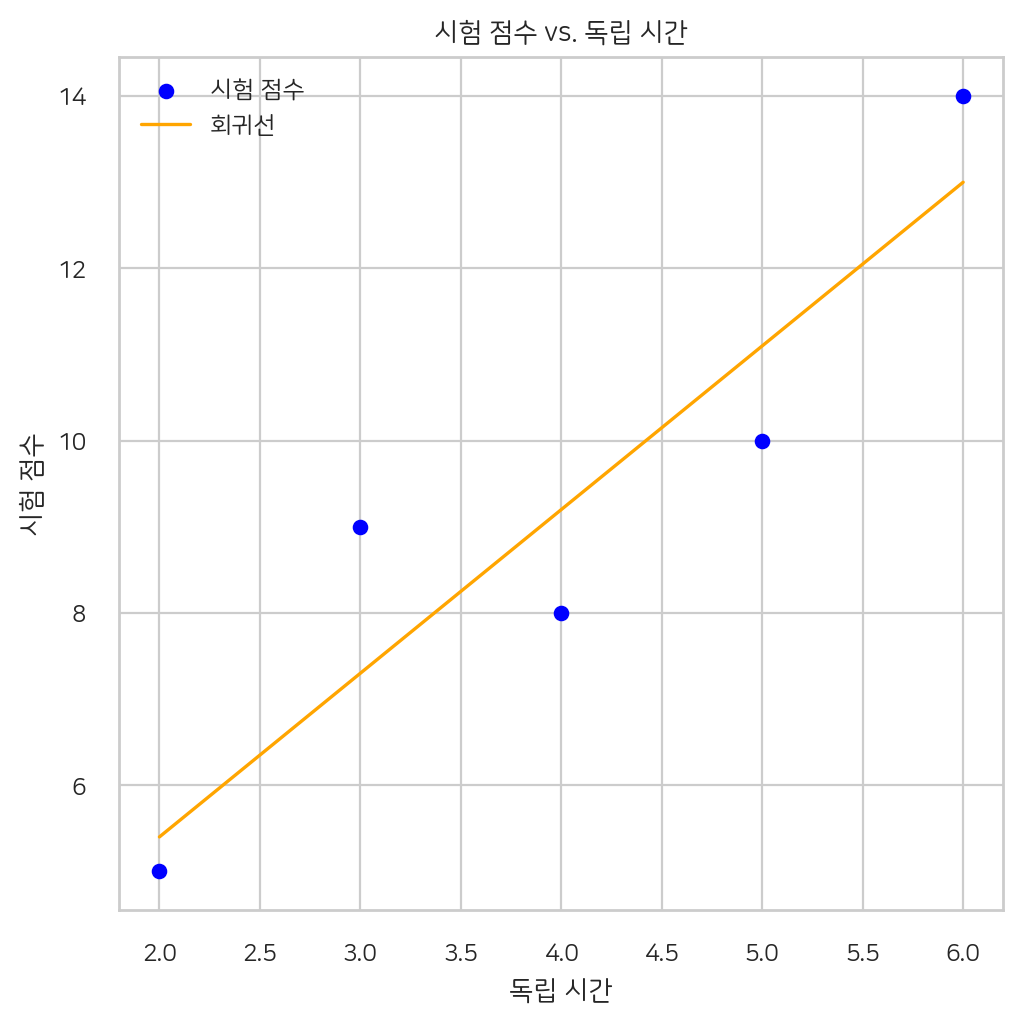

상관계수: 0.92
회귀계수: 1.90
결정계수 (R²): 0.84


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# 데이터 설정
X = np.array([2, 3, 4, 5, 6])
Y = np.array([5, 9, 8, 10, 14])

# 그래프 그리기
fig, ax = plt.subplots(figsize=(5, 5))
ax.scatter(X, Y, color='blue', label='시험 점수')
ax.set_title('시험 점수 vs. 독립 시간')
ax.set_xlabel('독립 시간')
ax.set_ylabel('시험 점수')
ax.legend()

# 선형 회귀 모델 생성 및 훈련
model = LinearRegression().fit(X.reshape(-1, 1), Y)

# 회귀선 그리기
predicted_Y = model.predict(X.reshape(-1, 1))
plt.plot(X, predicted_Y, color='orange', linestyle='-', label='회귀선')
plt.legend()

# 그래프 보여주기
plt.show()

# 상관계수, 회귀계수 및 결정계수 (R²) 계산 및 출력
correlation_coefficient = np.corrcoef(X, Y)[0, 1]
regression_coefficient = model.coef_[0]
r_squared = model.score(X.reshape(-1, 1), Y)

print(f"상관계수: {correlation_coefficient:.2f}")
print(f"회귀계수: {regression_coefficient:.2f}")
print(f"결정계수 (R²): {r_squared:.2f}")

### 오차의 종류

1. **SSE (Sum of Squared Errors)**  
   - 실제값과 회귀에서 추정한 값 간의 차이의 제곱의 합.<br>
        $\text{SSE} = \sum_{i=1}^{n} (y_i - \hat{y}_i)^2$<br>
        여기서 $y_i$는 실제값, $\hat{y}_i$는 예측값.

2. **SST (Total Sum of Squares)**  
   - 전체 평균과 각 데이터 간의 차이의 제곱의 합.<br>
        $\text{SST} = \sum_{i=1}^{n} (y_i - \bar{y})^2$<br>
        여기서 $\bar{y}$는 전체 평균.

3. **SSR (Regression Sum of Squares)**  
   - 예측한 추정값과 전체 평균 간의 차이의 제곱의 합.<br>
        $\text{SSR} = \sum_{i=1}^{n} (\hat{y}_i - \bar{y})^2$<br>

$$R^2 = \frac{\text{SSR}}{\text{SST}} = 1 - \frac{\text{SSE}}{\text{SST}}$$


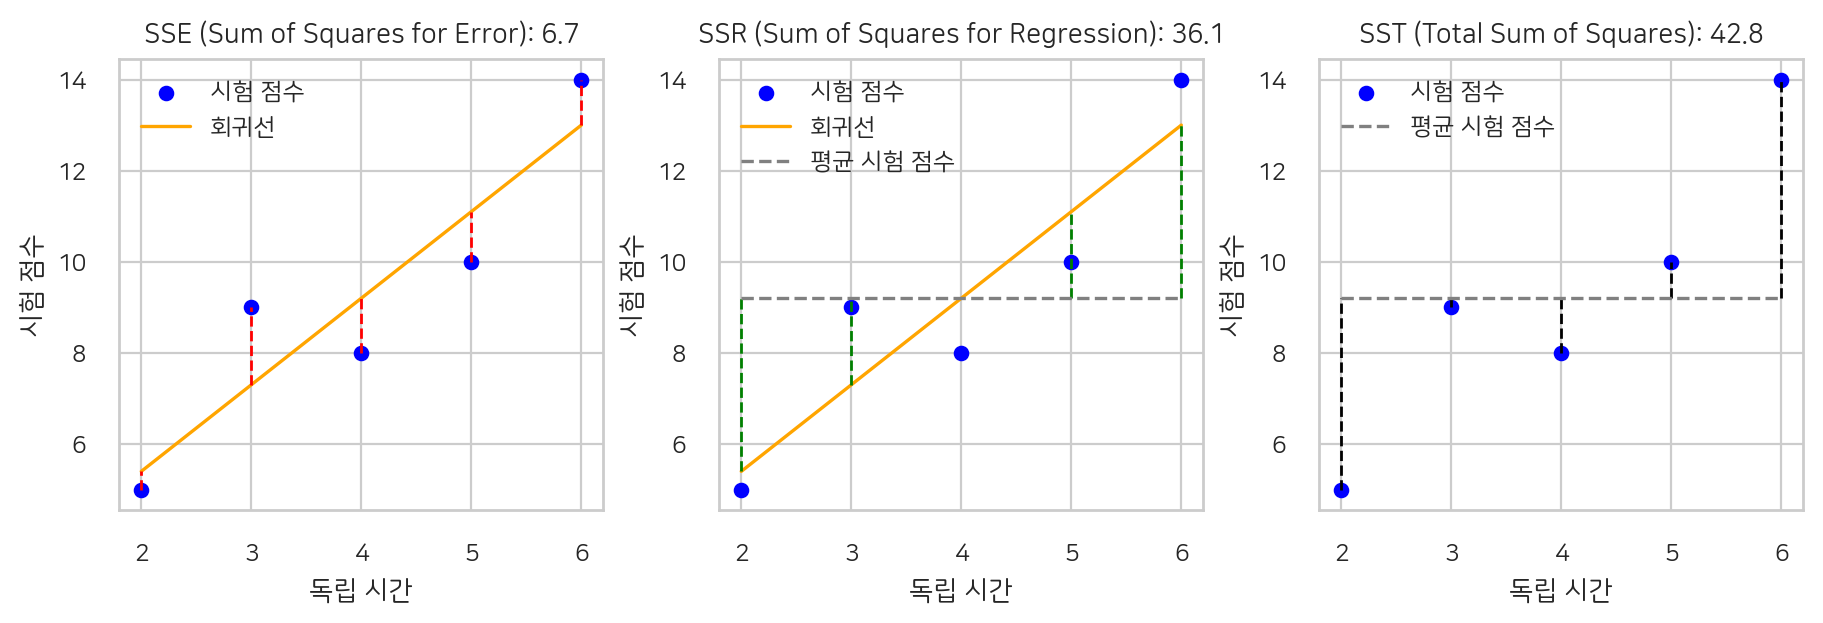

상관계수: 0.92
회귀계수: 1.90
결정계수 (R²): 0.84


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# 데이터 설정
X = np.array([2, 3, 4, 5, 6])
Y = np.array([5, 9, 8, 10, 14])

# 선형 회귀 모델 생성 및 훈련
model = LinearRegression().fit(X.reshape(-1, 1), Y)
predicted_Y = model.predict(X.reshape(-1, 1))
mean_y = np.mean(Y)

# 그래프 크기 설정
fig, axs = plt.subplots(1, 3, figsize=(9, 3))

# SSE 시각화
axs[0].scatter(X, Y, color='blue', label='시험 점수')
axs[0].plot(X, predicted_Y, color='orange', linestyle='-', label='회귀선')
for x, y, pred_y in zip(X, Y, predicted_Y):
    axs[0].vlines(x=x, ymin=min(y, pred_y), ymax=max(y, pred_y), color='red', linestyle='--', linewidth=1)
sse = np.sum((Y - predicted_Y) ** 2)
axs[0].set_title(f'SSE (Sum of Squares for Error): {sse:.1f}')
axs[0].set_xlabel('독립 시간')
axs[0].set_ylabel('시험 점수')
axs[0].legend()

# SSR 시각화
axs[1].scatter(X, Y, color='blue', label='시험 점수')
axs[1].plot(X, predicted_Y, color='orange', linestyle='-', label='회귀선')
for x, pred_y in zip(X, predicted_Y):
    axs[1].vlines(x=x, ymin=min(mean_y, pred_y), ymax=max(mean_y, pred_y), color='green', linestyle='--', linewidth=1)
ssr = np.sum((predicted_Y - mean_y) ** 2)
axs[1].hlines(y=mean_y, xmin=min(X), xmax=max(X), color='gray', linestyle='--', label='평균 시험 점수')
axs[1].set_title(f'SSR (Sum of Squares for Regression): {ssr:.1f}')
axs[1].set_xlabel('독립 시간')
axs[1].set_ylabel('시험 점수')
axs[1].legend()

# SST 시각화
axs[2].scatter(X, Y, color='blue', label='시험 점수')
for x, y in zip(X, Y):
    axs[2].vlines(x=x, ymin=min(y, mean_y), ymax=max(y, mean_y), color='black', linestyle='--', linewidth=1)
sst = np.sum((Y - mean_y) ** 2)
axs[2].hlines(y=mean_y, xmin=min(X), xmax=max(X), color='gray', linestyle='--', label='평균 시험 점수')
axs[2].set_title(f'SST (Total Sum of Squares): {sst:.1f}')
axs[2].set_xlabel('독립 시간')
axs[2].set_ylabel('시험 점수')
axs[2].legend()

plt.show()

# 상관계수, 회귀계수 및 결정계수 (R²) 계산 및 출력
correlation_coefficient = np.corrcoef(X, Y)[0, 1]
regression_coefficient = model.coef_[0]
r_squared = model.score(X.reshape(-1, 1), Y)
print(f"상관계수: {correlation_coefficient:.2f}")
print(f"회귀계수: {regression_coefficient:.2f}")
print(f"결정계수 (R²): {r_squared:.2f}")